# INTRODUÇÃO

Esse é meu primeiro projeto de aprendizado de máquina para o Kaggle, foi totalmente construído em python e suas bibliotecas com a finalidade de aprender e entender mais sobre a plataforma, bem como utilizar alguns conceitos de ciência de dados na prática.

**Importação das bibliotecas necessárias**

In [1]:
# Análise e manejamento de dados
import pandas as pd
import numpy as np
import random as rnd

# Visualização
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Machine learning
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression

**Coleta dos dados**  
A combinação do conjunto de treino com o conjunto de teste facilita operações futuras que possam vir a ser necessárias nos dois conjuntos mutuamente.

In [2]:
train_df = pd.read_csv('/kaggle/input/titanic/train.csv')
test_df = pd.read_csv('/kaggle/input/titanic/test.csv')
combined_train_test = [train_df, test_df]

# COMPREENDENDO O CONJUNTO DE DADOS
É importante entender um pouco mais sobre a situação do conjunto de dados inicial, identificando colunas que possam ter valores faltantes, compreendendo a tipagem dos dados, como se dá a distribuição das variáveis numéricas e categóricas etc.
Desta maneira será possível traçar as melhores estratégias do pré-processamento dos dados.

In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
print(train_df.isnull().sum())
print('-'*50)
print(test_df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
--------------------------------------------------
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [5]:
print(train_df.info())
print('-'*50)
print(test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket      

In [6]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Panula, Mrs. Juha (Maria Emilia Ojala)",male,CA. 2343,G6,S
freq,1,577,7,4,644


**Conclusões**
* Nem todas as features do conjunto estão em tipagem numérica, sendo que a coluna Ticket e a coluna Cabin possuem dados mistos.
* As colunas Age, Cabin e Embarked possuem valores faltantes, sendo que Cabin possui mais de 75% dos dados nulos.
* A coluna Sex possui 65% de valores masculinos.
* Poucos passageiros viajavam em primeira classe.
* A coluna Ticket possui aproximadamente 22% de valores duplicados.


**Prováveis ações**
* Completar as colunas Age e Embarked, uma vez que elas contribuiem para a sobrevivência visto a descrição do acontecimento.
* Excluir a coluna PassengerId, já que não contribui com a sobrevivência.
* Excluir a coluna Ticket da análise, dado a quantidade alta de valores duplicados e a provável não correlação com a sobrevivência.
* Excluir a coluna Cabin da análise, em virtude da quantidade de valores faltantes.
* Criar uma nova coluna com a quantidade total de familiares a bordo através das colunas SibSp e Parch.
* Classificar Age e Fare em intervalos para transformar variáveis numéricas contínuas em categóricas ordinais.


**Hipóteses**  
Através da análise até agora pode-se fazer algumas suposições, cuja veracidade poderá ser verificada futuramente.  
São elas:
* Mulheres possuem maior probabilidade de terem sobrevivido.
* Crianças possuem maior probabilidade de terem sobrevivido.
* Passageiros de primeira classe possuem maior chance de terem sobrevivido.

# LIMPEZA E TRANSFORMAÇÃO DE DADOS
Será importante modificar as colunas do nosso conjunto de dados baseado nas observações feitas anteriormente, visando modificar os valores das nossas colunas para tipos numéricos, lidando com valores faltantes e removendo *features* que não sejam determinantes para a análise.

**Excluir *features* que não agregam à análise**  
Será benéfico excluir colunas que não agregam significativamente para nossa análise, como visto anteriormente, são elas:  
* PassengerId
* Ticket
* Cabin


In [8]:
train_df = train_df.drop(['PassengerId', 'Ticket', 'Cabin'], axis=1)

# Separando o ID do passageiro antes de deletá-lo pois será necessário na submissão dos resultados
passenger_id_test = test_df['PassengerId']

test_df = test_df.drop(['PassengerId', 'Ticket', 'Cabin'], axis=1)
combined_train_test = [train_df, test_df]

**Converter *features* não numéricas**  
A maioria dos modelos de *machine learning* requer valores numéricos, para isso, será necessário converter os valores que contém *strings* do nosso conjunto de dados.

**1. *Sex***  
A coluna *Sex* será mapeada em valores de 0 (masculino) ou 1 (feminino).

In [9]:
for dataset in combined_train_test:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)
    
# Visualizando nosso conjunto de treino
train_df.tail()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
886,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,13.00,S
887,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,30.00,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,NaN,1,2,23.45,S
889,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,30.00,C
890,0,3,"Dooley, Mr. Patrick",0,32.0,0,0,7.75,Q


**1. *Embarked***  
A coluna Embarked será mapeada em valores de 0 (C), 1 (Q) ou 2 (S), mas antes será necessário completar seus valores faltantes.  
Como existem apenas dois valores faltantes, estes serão preenchidos com o valor mais recorrente do conjunto de dados.

In [10]:
# Encontrando o valor mais recorrente de Embarked no conjunto de treino
embarked_mode = train_df.Embarked.dropna().mode()[0]

# Preenchendo os valores faltantes com a moda da coluna.
for dataset in combined_train_test:
    dataset['Embarked'] = dataset['Embarked'].fillna(embarked_mode)
    
# Mapeando os valores
for dataset in combined_train_test:
    dataset['Embarked'] = dataset['Embarked'].map( {'C': 0, 'Q': 1, 'S': 2} ).astype(int)
    
train_df.tail()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
886,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,13.00,2
887,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,30.00,2
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,NaN,1,2,23.45,2
889,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,30.00,0
890,0,3,"Dooley, Mr. Patrick",0,32.0,0,0,7.75,1


**Preenchendo valores faltantes *features* contínuas**  

1. **Age**  
Como a idade é um fator relevante para a análise, o preenchimento de seus valores faltantes será necessário.  Para isso, deve-se visar um valor que menos aumenta o ruído dos dados.  
Uma das estratégias para isso é utilizar *features* que possuem correlação com a idade, como a classe de viagem e o sexo da pessoa, e encontrar a mediana da idade para cada combinação entre as *features* relacionadas (Pclass = 0 e Sex = 0, PClass = 0 e Sex = 1, e assim por diante).



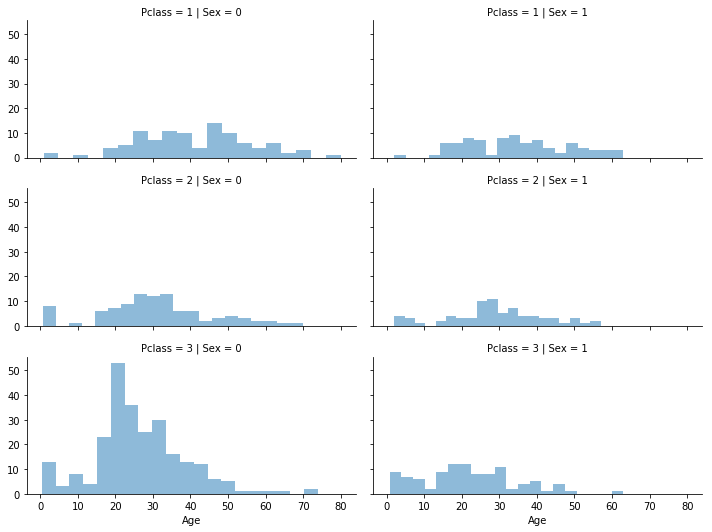

In [11]:
# Construindo a visualização dos histogramas da idade em uma grade com as possíveis combinações entre Pclass e Sex
grid = sns.FacetGrid(train_df, row='Pclass', col='Sex', height=2.5, aspect=2)
grid.map(plt.hist, 'Age', alpha=0.5, bins=20)

Através da visualização fica nítida a correlação entre Pclass, Sex e Age (mais visível quando Pclass=3 e Sex=0).  
Verificada a correlação, deve-se encontrar os valores medianos de Age para Pclass x Sex.  

In [12]:
# Array vazio que conterá os valores para as possíveis combinações
guess_ages = np.zeros((2, 3)) 

for dataset in combined_train_test:
    for sex in range(2):
        for pclass in range(3):
            # Encontrando as idades para cada combinação
            guess_df = dataset[((dataset['Sex'] == sex) & (dataset['Pclass'] == pclass + 1))]['Age'].dropna()

            # Armazenando a mediana das idades das combinações em guess_ages
            guess_ages[sex, pclass] = guess_df.median()
            
    for sex in range(2):
        for pclass in range(3):
            # Preenchendo os valores faltantes
            dataset.loc[(dataset['Age'].isnull()) & (dataset['Sex'] == sex) & (dataset['Pclass'] == pclass+1), 
                        'Age'] = guess_ages[sex, pclass]

    # Convertendo os valores de Age para int
    dataset['Age'] = dataset['Age'].astype(int)

train_df.tail()


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
886,0,2,"Montvila, Rev. Juozas",0,27,0,0,13.00,2
887,1,1,"Graham, Miss. Margaret Edith",1,19,0,0,30.00,2
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,21,1,2,23.45,2
889,1,1,"Behr, Mr. Karl Howell",0,26,0,0,30.00,0
890,0,3,"Dooley, Mr. Patrick",0,32,0,0,7.75,1


Resolvido o problema dos valores de idade faltantes!  
No entanto, seria melhor para visualizar a correlação com a sobrevivência se a idade fosse separada em faixas etárias, conforme planejado anteriormente.

In [13]:
# Classificando as idades em faixas etárias de 10 anos
for dataset in combined_train_test:    
    dataset.loc[dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age'] = 4
    
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",0,1,1,0,7.2500,2
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2,1,0,71.2833,0
2,1,3,"Heikkinen, Miss. Laina",1,1,0,0,7.9250,2
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2,1,0,53.1000,2
4,0,3,"Allen, Mr. William Henry",0,2,0,0,8.0500,2


2. **Fare**  
Ainda falta um valor faltante da *feature* Fare no conjunto de teste, que será preenchido com a mediana da coluna.

In [14]:
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)

Apesar de resolvido o problema de valores faltantes, seria melhor se a Fare fosse separada em intervalos assim como Age, categorizando os dados.

In [15]:
# Dividindo Fare em 4 quantis
for dataset in combined_train_test:
    dataset.loc[dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

combined_train_test = [train_df, test_df]
    
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",0,1,1,0,0,2
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2,1,0,3,0
2,1,3,"Heikkinen, Miss. Laina",1,1,0,0,1,2
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2,1,0,3,2
4,0,3,"Allen, Mr. William Henry",0,2,0,0,1,2


# FEATURE ENGINEERING
Aqui os dados presentes no conjunto de dados serão utilizados para criar novas *features* mais relevantes para o problema.

1. **FamilySize**  
Somando os valores das colunas SibSp, Parch e o próprio passageiro, encontra-se o tamanho total da família. Isso possibilita a exclusão de SibSp e Parch do nosso conjunto de dados.

In [16]:
# Criando FamilySize
for dataset in combined_train_test:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
    
# Deletando SibSp e Parch
train_df = train_df.drop(['SibSp', 'Parch'], axis=1)
test_df = test_df.drop(['SibSp', 'Parch'], axis=1)
combined_train_test = [train_df, test_df]
    

train_df.head()

,Survived,Pclass,Name,Sex,Age,Fare,Embarked,FamilySize
0,0,3,"Braund, Mr. Owen Harris",0,1,0,2,2
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2,3,0,2
2,1,3,"Heikkinen, Miss. Laina",1,1,1,2,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2,3,2,2
4,0,3,"Allen, Mr. William Henry",0,2,1,2,1


2. **IsAlone**  
Para verificar a correlação de estar sozinho no navio com a sobrevivência, podemos criar uma coluna IsAlone através de FamilySize.

In [17]:
# Criando IsAlone
for dataset in combined_train_test:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

train_df.tail()

,Survived,Pclass,Name,Sex,Age,Fare,Embarked,FamilySize,IsAlone
886,0,2,"Montvila, Rev. Juozas",0,1,1,2,1,1
887,1,1,"Graham, Miss. Margaret Edith",1,1,2,2,1,1
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,1,2,2,4,0
889,1,1,"Behr, Mr. Karl Howell",0,1,2,0,1,1
890,0,3,"Dooley, Mr. Patrick",0,1,0,1,1,1


3. **Title**  
A princípio a coluna Name não aparenta ajudar na análise, contudo, podemos retirar o título do passageiro oferecido na *feature*, o qual provavelmente possui correlação com a sobrevivência. 

In [18]:
# Criando a coluna Title a partir da extração dos títulos utilizando Regex
for dataset in combined_train_test:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

train_df['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

Extraídos os títulos, percebe-se que muitos deles podem ser reescritos de maneira mais comum ou serem classificados como raros (uma vez que representam uma porcentagem pequena da população).

In [19]:
for dataset in combined_train_test:
    # Classificando títulos incomuns como raros
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 
                                                 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    # Substituindo maneiras incomuns de escrever títulos
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
# Excluindo a coluna Name
train_df = train_df.drop('Name', axis=1)
test_df = test_df.drop('Name', axis=1)
combined_train_test = [train_df, test_df]

train_df.tail()

,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize,IsAlone,Title
886,0,2,0,1,1,2,1,1,Rare
887,1,1,1,1,2,2,1,1,Miss
888,0,3,1,1,2,2,4,0,Miss
889,1,1,0,1,2,0,1,1,Mr
890,0,3,0,1,0,1,1,1,Mr


Agora a coluna Title será mapeada em valores numéricos para que o conjunto de dados possua apenas dados do tipo *int*.

In [20]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combined_train_test:
    dataset['Title'] = dataset['Title'].map(title_mapping)

train_df.tail()

,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize,IsAlone,Title
886,0,2,0,1,1,2,1,1,5
887,1,1,1,1,2,2,1,1,2
888,0,3,1,1,2,2,4,0,2
889,1,1,0,1,2,0,1,1,1
890,0,3,0,1,0,1,1,1,1


# COMPREENDENDO A CORRELAÇÃO DAS FEATURES COM A SOBREVIVÊNCIA
Agora que os conjuntos de dados estão organizados e sem valores faltantes pode-se estudar o impacto que cada *feature* possui na sobrevivência do passageiro observando a média de Survival para cada valor de cada *feature*.  
Para isso, será criada uma visualização para cada feature utilizando *bar plots*.

/opt/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


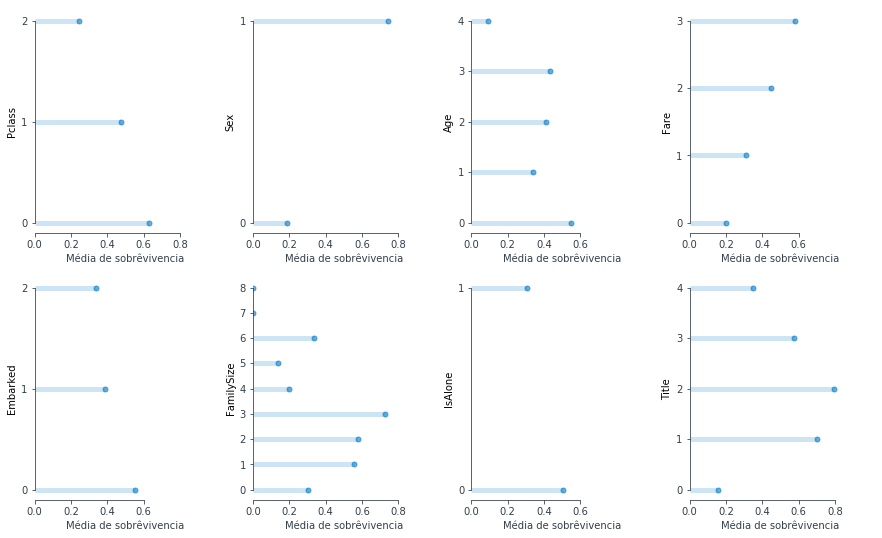

In [21]:
# Alterando a fonte
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Helvetica'

# Alterando o estilo dos eixos
plt.rcParams['axes.edgecolor']='#333F4B'
plt.rcParams['axes.linewidth']=0.8
plt.rcParams['xtick.color']='#333F4B'
plt.rcParams['ytick.color']='#333F4B'

# Criando os bar plots
fig, ax = plt.subplots(2, 4)
fig.set_size_inches(15, 9)
df_column = 0
for row in range(2):
    for col in range(4):
        survival_correlation = pd.DataFrame(train_df[[train_df.columns[1:].tolist()[df_column], 
                                                      'Survived']].groupby([train_df.columns[1:].tolist()[df_column]], 
                                                                                 as_index=False).mean().iloc[:, 1].values)
        my_range=list(range(len(survival_correlation)))
        ax[row, col].hlines(y=my_range, xmin=0, xmax=survival_correlation, color='#007ACC', alpha=0.2, linewidth=5)
        ax[row, col].plot(survival_correlation, my_range, "o", markersize=5, color='#007ACC', alpha=0.6)
        ax[row, col].set_xlim(0, 1)
        ax[row, col].set_yticks(np.arange(len(survival_correlation)))

        # Alterando o estilo das labels
        ax[row, col].set_xlabel('Média de sobrêvivencia', color = '#333F4B')
        ax[row, col].set_ylabel(train_df.columns[1:].tolist()[df_column])

        # Retirando os limites de cima e da direita do gráfico
        ax[row, col].spines['top'].set_color('none')
        ax[row, col].spines['right'].set_color('none')
        ax[row, col].spines['left'].set_smart_bounds(True)
        ax[row, col].spines['bottom'].set_smart_bounds(True)
        df_column += 1

plt.show()

Apesar de extremamente raro, observamos correlação em todas as features observadas.  
Provavelmente devido à competição ser voltada para iniciantes e a seleção prévia de quais features seriam utilizadas através do conhecimento do problema. 

# Comparação de modelos
Chegou a hora de utilizar diferentes modelos de machine learning para classificar o conjunto de teste, então, enviar as predições do melhor modelo.

/opt/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


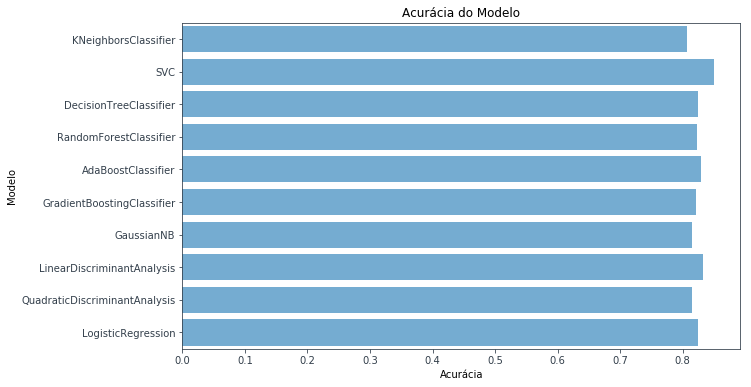

In [22]:
classifiers = [
    KNeighborsClassifier(3),
    SVC(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    LogisticRegression()
]

log_cols = ["Modelo", "Acurácia"]
log = pd.DataFrame(columns=log_cols)


sss = StratifiedShuffleSplit(n_splits=10, test_size=0.1, random_state=9)

# Valores features
X = train_df.values[0::, 1::]
# Valores survival
y = train_df.values[0::, 0]

acc_dict = {}

for train_index, test_index in sss.split(X, y):
    # Separando valores de validação no conjunto de treino para verificar a acurácia do modelo
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    for clf in classifiers:
        name = clf.__class__.__name__
        clf.fit(X_train, y_train)
        train_predictions = clf.predict(X_test)
        acc = accuracy_score(y_test, train_predictions)
        if name in acc_dict:
            acc_dict[name] += acc
        else:
            acc_dict[name] = acc

for clf in acc_dict:
    acc_dict[clf] = acc_dict[clf] / 10.0
    log_entry = pd.DataFrame([[clf, acc_dict[clf]]], columns=log_cols)
    log = log.append(log_entry)

plt.xlabel('Acurácia')
plt.title('Acurácia do Modelo')
fig = plt.gcf()
fig.set_size_inches(10, 6)
sns.barplot(x='Acurácia', y='Modelo', data=log, color='#007ACC', alpha=0.6)


Conclui-se que o modelo com melhor resultado no conjunto de treino foi o de Support Vector Machine (SVC).

# Enviando o resultado

In [23]:
# Treinando modelo
best_classifier = SVC()
best_classifier.fit(train_df.values[0::, 1::], train_df.values[0::, 0])

# Criando um df dos resultados
submission = pd.DataFrame()
submission['PassengerId'] = passenger_id_test.values
submission['Survived'] = best_classifier.predict(test_df)

# Convertendo o df para csv
submission.to_csv('submission.csv', index=False)